In [5]:
import pandas as pd
import numpy as np
import pandas_profiling

data = pd.read_csv("../../data/raw/data.csv")

In [30]:
data.head()
#released this won't work well
data['teamWon'] = ['blue' if  x == 1 else 'red' for x in data['blueWins']]
data['firstBlood'] = ['blue' if  x == 1 else 'red' for x in data['blueFirstBlood']]
data['blueKDA'] = (data.blueKills + data.blueAssists)/data.blueDeaths
data['redKDA'] = (data.redKills + data.redAssists)/data.redDeaths

#New idea, resturcter data in terms of winning teams
redTeamWon = data[data['blueWins'] == 0]
redTeamWon = redTeamWon.drop(columns=['blueWins','blueKDA','teamWon','blueFirstBlood','blueDragons'])
redTeamWon['firstBlood'] = ['yes' if  x == 1 else 'no' for x in redTeamWon['redFirstBlood']]
redTeamwon = readTeamWon.rename(columns={"redKDA":"KDA", "redDragons":"dragonsTaken"})
redTeamWon.head()

,gameId,blueWardsPlaced,blueWardsDestroyed,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueHeralds,blueTowersDestroyed,blueTotalGold,...,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,firstBlood,redKDA
0,4519157822,28,2,9,6,11,0,0,0,17210,...,6.8,17047,197,55,-643,8,19.7,1656.7,no,1.555556
1,4523371949,12,1,5,5,5,0,0,0,14712,...,6.8,17438,240,52,2908,1173,24.0,1762.0,yes,1.400000
2,4521474530,15,0,7,11,4,1,0,0,16113,...,6.8,17254,203,28,1172,1033,20.3,1728.5,yes,3.571429
3,4524384067,43,1,4,5,5,1,1,0,15157,...,7.0,17961,235,47,1321,7,23.5,1647.8,yes,3.750000
4,4436033771,75,4,6,6,6,0,0,0,16400,...,7.0,18313,225,67,1004,-230,22.5,1740.4,yes,2.166667


In [65]:
wardData = data[['teamWon', 'blueWardsPlaced', 'redWardsPlaced']]
killsData = data[]
groupWardData = wardData.groupby('teamWon').agg({'blueWardsPlaced':['mean']})
groupWardData.head()

,blueWardsPlaced
,mean
teamWon,
blue,22.289858
red,22.286725


<AxesSubplot:xlabel='teamWon'>

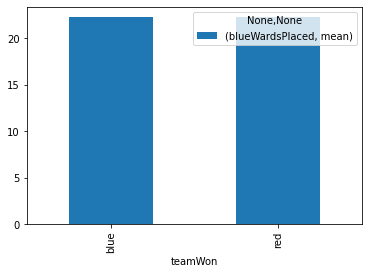

In [72]:
groupWardData.plot.bar()